In [1]:
from reservoirUtils import *
%load_ext autoreload
%autoreload 2

## Peña et al. (2002)
### No gaps

(<Figure size 1200x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9822aa5160>)

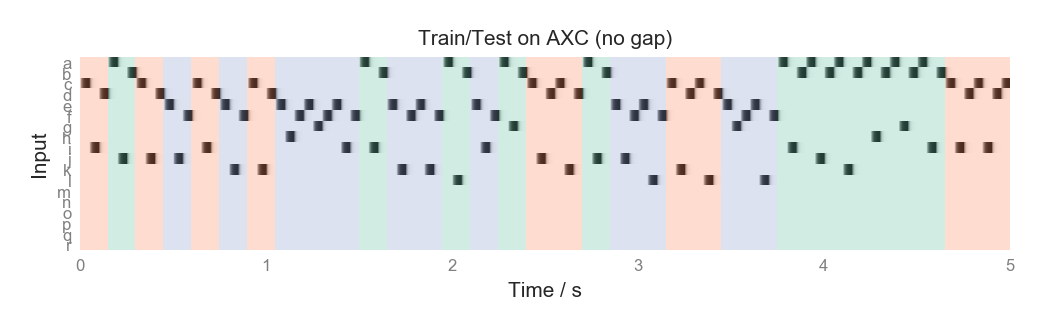

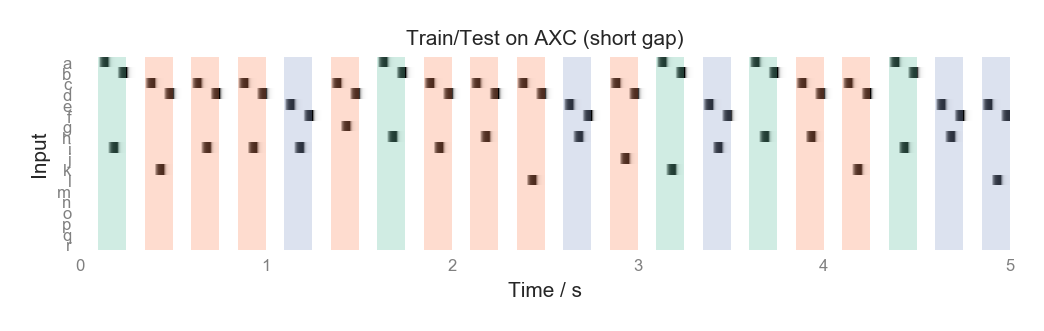

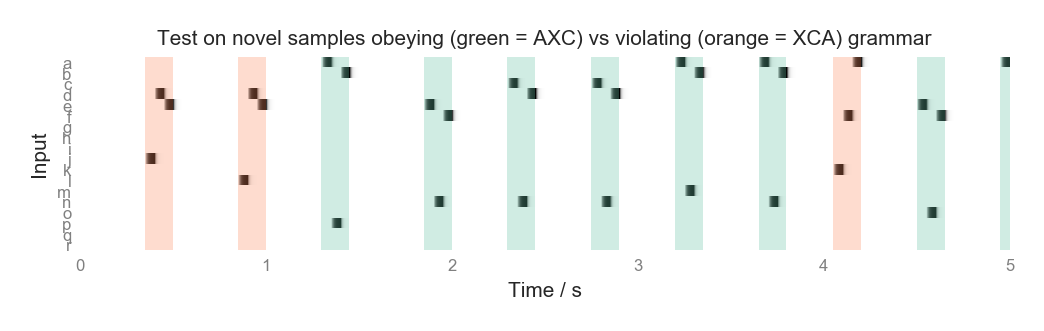

In [4]:
inputParams = defaultInputParams.copy()
inputParams['experiment'] = 'normal'
inputParams['chunkList'] = [['a','ghijkl+','b'],['c','ghijkl+','d'],['e','ghijkl+','f']]
inputParams['syllables'] = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']
inputParams['gapRange'] = [0,0]
inputs_nogap = getInputs(inputParams,totalTime=2000)
inputsTest_nogap = getInputs(inputParams,totalTime=100)
plotInputs(inputsTest_nogap,title='Train/Test on AXC (no gap)')

inputParams['gapRange'] = [2,2]
inputParams['interChunkSyllables'] = [' ']
inputs_gap = getInputs(inputParams, totalTime=2000)
inputsTest_gap = getInputs(inputParams, totalTime=100)
plotInputs(inputsTest_gap,title='Train/Test on AXC (short gap)')

inputParams['gapRange'] = [5,8]
inputParams['chunkList'] = [['a','mnopqr+','b'],['c','mnopqr+','d'],['e','mnopqr+','f'],['ghijkl+','b','c'],['ghijkl+','d','e'],['ghijkl+','f','a']]
inputParams['chunkLabels'] = [0,0,0,1,1,1]
inputsTest_new = getInputs(inputParams, totalTime = 100)
plotInputs(inputsTest_new,title='Test on novel samples obeying (green = AXC) vs violating (orange = XCA) grammar')

In [ ]:
hyperparams = {'Ng' : 300, #no. neurons in each reservoir 
               'n' : 300, #no. reservoir neurons the output neuron is connected to 
               'p' : 1, #connection probability amongst recurrent units
               'tau' : 10, #neuron time constant, in ms 
               'dt' : 1, #simulation timestep in ms
               'g_GG' : 1.5, #RNN chaos parameters ( > 1 means chaos)
               'g_Gz' : 1, #feedback strength,
               'alpha' : 100, #learning rate
               'sigma' : 0.3,#amount of network noise
               'Nz' : 3, #no. of output neurons
               'Ni' : inputs['data'].shape[1]}

In [ ]:
#initialise reservoirs
reservoirPair_nogap = ReservoirPair(hyperparams,inputs_nogap)
reservoirPair_gap = ReservoirPair(hyperparams,inputs_gap)

#store test inputs
reservoirPair_nogap.storeInputs(inputsTest_nogap,name='test')
reservoirPair_gap.storeInputs(inputsTest_gap,name='test')
reservoirPair_nogap.storeInputs(inputsTest_new='test_new')
reservoirPair_gap.storeInputs(inputsTest_new='test_new')

#train
reservoirPair_nogap.trainPair()
reservoirPair_gap.trainPair()

#test on old and new 
reservoirPair_nogap.testPair(testName='test',testData='test',Ntest=10)
reservoirPair_gap.testPair(testName='test',testData='test',Ntest=10)
reservoirPair_nogap.testPair(testName='test_new',testData='test_new',Ntest=10)
reservoirPair_gap.testPair(testName='test_new',testData='test_new',Ntest=10)

In [101]:
pickleAndSave(reservoirPair5,'pena1')

In [86]:
reservoirPair5 = loadAndDepickle('pena1')

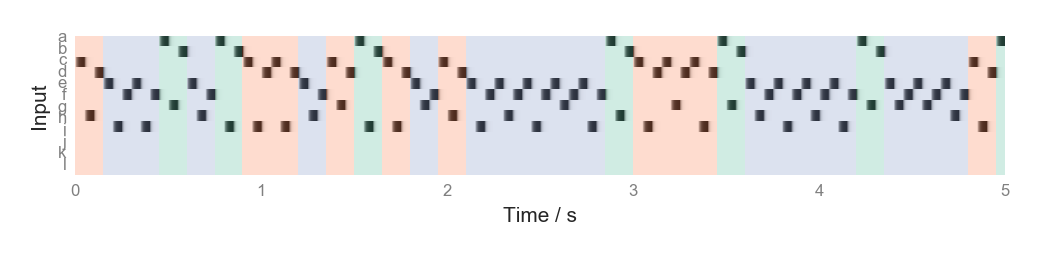

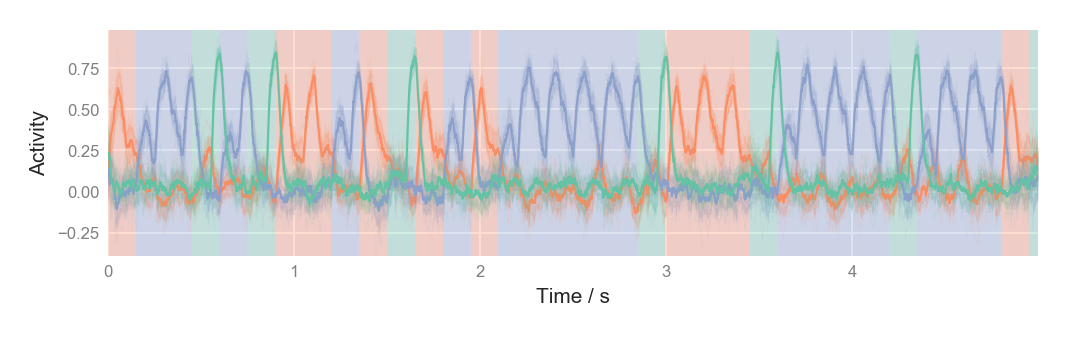

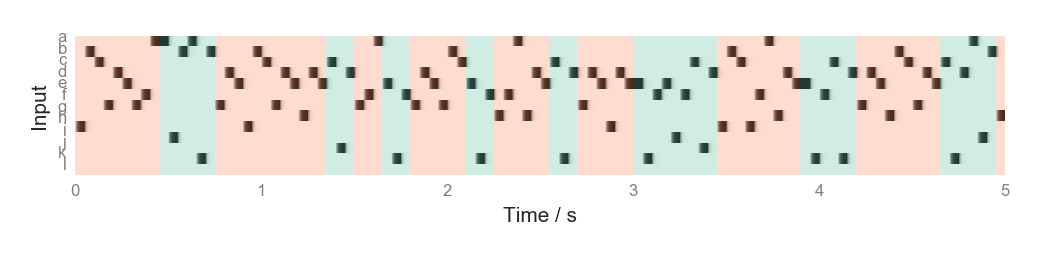

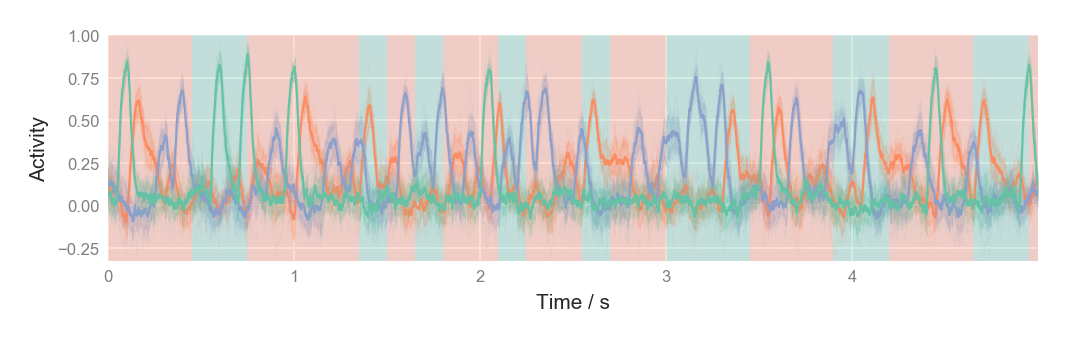

In [100]:
plotInputs(reservoirPair5.inputDict['test'],tend=5)
plotTest(reservoirPair5,testName='posttraining',testData='test',tend=5,colorOrders=[1,2,0])
plotInputs(reservoirPair5.inputDict['test_1'],tend=5)
plotTest(reservoirPair5,testName='posttraining_1',testData='test_1',tend=5,colorOrders=[1,2,0])

In [94]:
inputs6 = getInputs([['a','randtrain','b'],['c','randtrain','d'],['e','randtrain','f']],type_='pena',gapRange=[1,2],totalTime = 5000,syllables=['a','b','c','d','e','f','g','h','i','j','k','l',' '])
inputsTest6 = getInputs([['a','randtrain','b'],['c','randtrain','d'],['e','randtrain','f']],type_='pena',gapRange=[1,2],totalTime = 20,syllables=['a','b','c','d','e','f','g','h','i','j','k','l',' '])
inputsTest6_1 = getInputs([['a','randtest','b'],['c','randtest','d'],['e','randtest','f'],
                           ['randtrain','b','c'],['randtrain','d','e'],['randtrain','f','a']],type_='pena_test',gapRange=[1,2],totalTime = 20,syllables=['a','b','c','d','e','f','g','h','i','j','k','l',' '])

In [ ]:
hyperparams = {'Ng' : 300, #no. neurons in each reservoir 
               'n' : 300, #no. reservoir neurons the output neuron is connected to 
               'p' : 1, #connection probability amongst recurrent units
               'tau' : 10, #neuron time constant, in ms 
               'dt' : 1, #simulation timestep in ms
               'g_GG' : 1.5, #RNN chaos parameters ( > 1 means chaos)
               'g_Gz' : 1, #feedback strength,
               'alpha' : 100, #learning rate
               'sigma' : 0.3,#amount of network noise
               'Nz' : 3, #no. of output neurons
               'Ni' : inputs6['data'].shape[1]}

In [ ]:
reservoirPair6 = ReservoirPair(hyperparams,inputs6)
reservoirPair6.storeInputs(inputsTest6,name='test')
reservoirPair6.storeInputs(inputsTest6_1,name='test_1')
reservoirPair6.trainPair()
reservoirPair6.testPair(testName='posttraining',testData='test',Ntest=10)
reservoirPair6.testPair(testName='posttraining_1',testData='test_1',Ntest=10)

In [97]:
pickleAndSave(reservoirPair6,'pena2')

In [83]:
reservoirPair6 = loadAndDepickle('pena2')

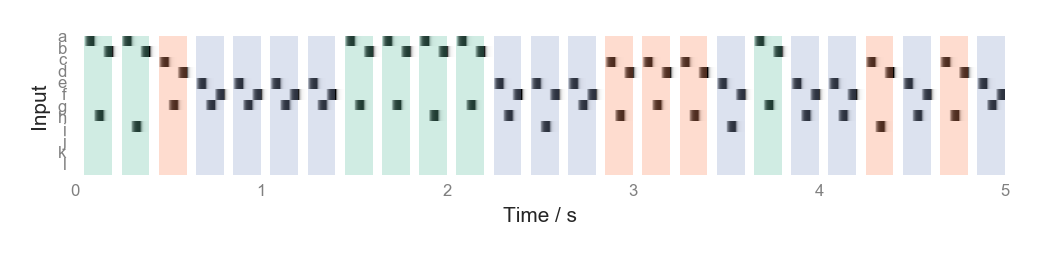

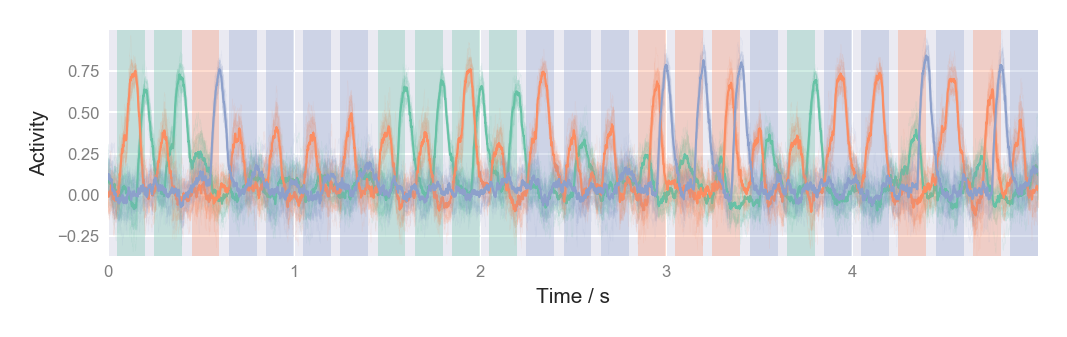

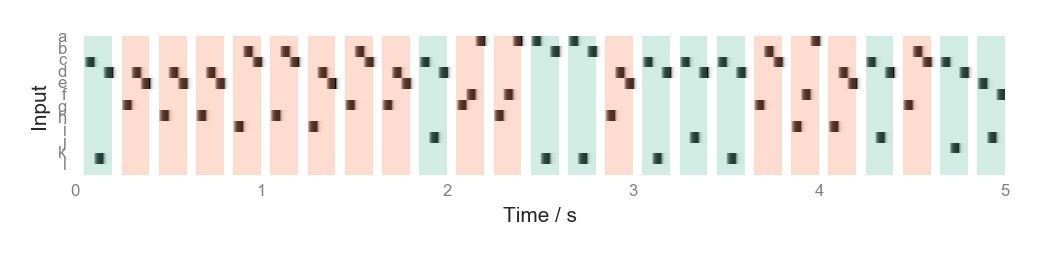

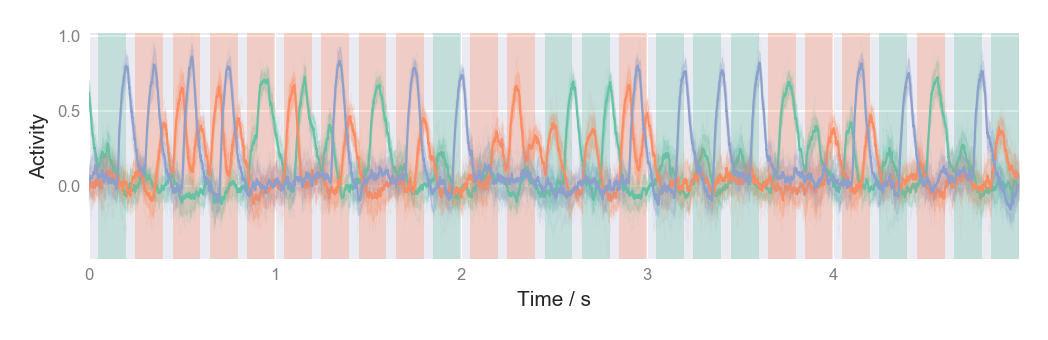

In [96]:
plotInputs(reservoirPair6.inputDict['test'],tend=5)
plotTest(reservoirPair6,testName='posttraining',testData='test',tend=5,colorOrders=[0,1,2])
plotInputs(reservoirPair6.inputDict['test_1'],tend=5)
plotTest(reservoirPair6,testName='posttraining_1',testData='test_1',tend=5,colorOrders=[0,1,2])